**Task 5 - SALES PREDICTION USING PYTHON**

**Import the libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

**Load the Data**

In [2]:
sales_data = pd.read_csv('/content/Advertising.csv')


In [3]:
sales_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
sales_data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
sales_data.shape

(200, 5)

In [6]:
sales_data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Convert categorical variables into dummy**

In [14]:
X = pd.get_dummies(X)

**Split the data**

In [15]:
X = sales_data[['TV', 'Radio', 'Newspaper']]
y = sales_data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Create a linear regression model and fit it to the training data**

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Make predictions on the test data**

In [17]:
y_pred = model.predict(X_test)

Scatter plot of actual vs predicted sales

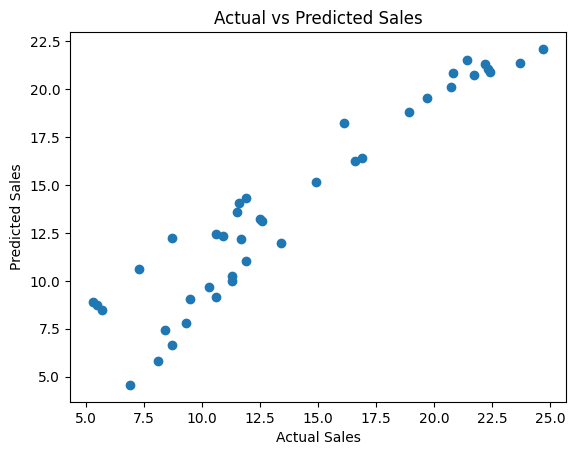

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [24]:
# Generate a range of data points for smoother predictions
X_range = pd.DataFrame(np.linspace(X_test.min(), X_test.max(), num=100), columns=X_test.columns)

In [25]:
# Make predictions on the range of data points
y_pred_range = model.predict(X_range)

**Visualize the actual and predicted outcomes**

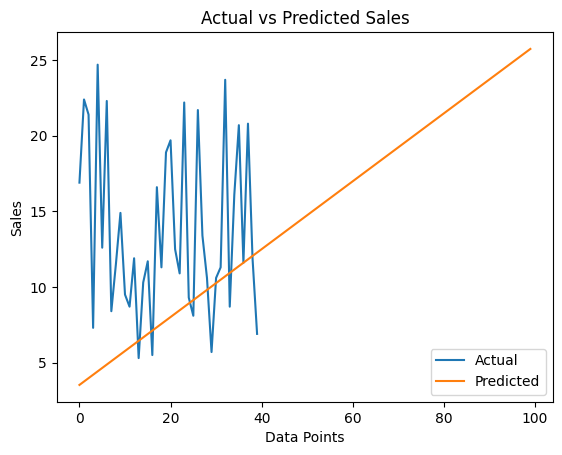

In [27]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_range, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()


**Evaluate the model**

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [19]:
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 3.1740973539761033
R-squared Score: 0.899438024100912
